In [1]:
import sys
import pickle
sys.path.append('../..')
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from lstm import transf_chik_pred
from lstm import apply_dengue_chik
from preprocessing import get_nn_data
from lstm import build_model, transf_chik_pred
from pgbm_model import  cross_dengue_chik_prediction
from sklearn.metrics import mean_squared_error as mse 
import matplotlib.dates as mdates
from plots_pgbm import predicted_vs_observed as p_o_pgbm
from plots_lstm import predicted_vs_observed as p_o_lstm
fmt = mdates.DateFormatter('%d-%b\n%Y')

In [2]:
CITY = 2304400
CITY_NAME = 'Fortaleza'
STATE = 'CE'
FILENAME_DATA = f'../../data/chik_{CITY}_cluster.csv'

In [3]:
df_chik = pd.read_csv(FILENAME_DATA, index_col = 'Unnamed: 0' )
df_chik.index = pd.to_datetime(df_chik.index)
df_chik

,casos_2304400,casos_est_2304400,casos_est_min_2304400,casos_est_max_2304400,p_rt1_2304400,p_inc100k_2304400,temp_min_2304400,temp_max_2304400,umid_min_2304400,pressao_min_2304400,...,casos_2306306,casos_est_2306306,casos_est_min_2306306,casos_est_max_2306306,p_rt1_2306306,p_inc100k_2306306,temp_min_2306306,temp_max_2306306,umid_min_2306306,pressao_min_2306306
2010-01-03,0,0.0,0,0,0.000000e+00,0.0000,23.333333,28.333333,66.333333,1009.000000,...,0,0.0,0,0,0.0,0.0,23.333333,28.333333,66.333333,1009.000000
2010-01-10,0,0.0,0,0,0.000000e+00,0.0000,24.714286,29.714286,59.571429,1009.428571,...,0,0.0,0,0,0.0,0.0,24.714286,29.714286,59.571429,1009.428571
2010-01-17,0,0.0,0,0,0.000000e+00,0.0000,25.142857,30.571429,58.142857,1010.714286,...,0,0.0,0,0,0.0,0.0,25.142857,30.571429,58.142857,1010.714286
2010-01-24,0,0.0,0,0,0.000000e+00,0.0000,24.714286,30.857143,54.142857,1009.000000,...,0,0.0,0,0,0.0,0.0,24.714286,30.857143,54.142857,1009.000000
2010-01-31,0,0.0,0,0,0.000000e+00,0.0000,24.714286,30.571429,61.428571,1007.857143,...,0,0.0,0,0,0.0,0.0,24.714286,30.571429,61.428571,1007.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-05,1159,1442.0,1277,1774,2.059320e-11,53.6735,23.857143,28.857143,72.411271,1009.857143,...,0,0.0,0,0,0.0,0.0,23.857143,28.857143,72.411271,1009.857143
2022-06-12,891,1250.5,1051,1654,9.992010e-16,46.5456,23.857143,28.571429,71.832614,1010.857143,...,0,0.0,0,0,0.0,0.0,23.857143,28.571429,71.832614,1010.857143
2022-06-19,725,1142.0,915,1587,4.315480e-11,42.5071,24.571429,29.571429,61.422371,1012.000000,...,0,0.0,0,0,0.0,0.0,24.571429,29.571429,61.422371,1012.000000
2022-06-26,246,724.0,435,1415,0.000000e+00,26.9484,24.142857,28.857143,64.995614,1011.000000,...,0,0.0,0,0,0.0,0.0,24.142857,28.857143,64.995614,1011.000000


<AxesSubplot:>

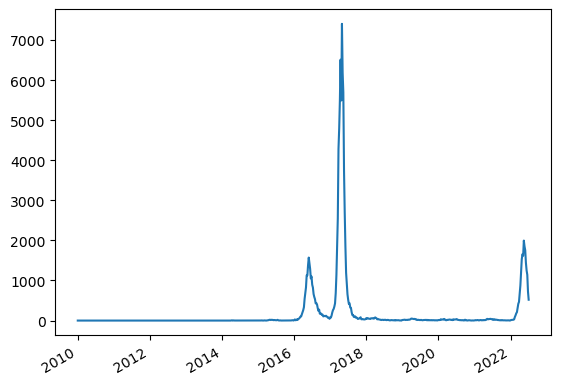

In [4]:
df_chik[f'casos_est_{CITY}'].plot()

In [5]:
INI_DATE = '2016-01-01'
END_DATE = '2022-07-01'

PREDICT_N = 4 # number of new days predicted
LOOK_BACK = 4 # number of last days used to make the prediction 
EPOCHS = 400
HIDDEN = 8
FEAT = df_chik.shape[1] +1 # number of features 

Apply the dengue model:

2023-01-17 11:42:08.604043: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


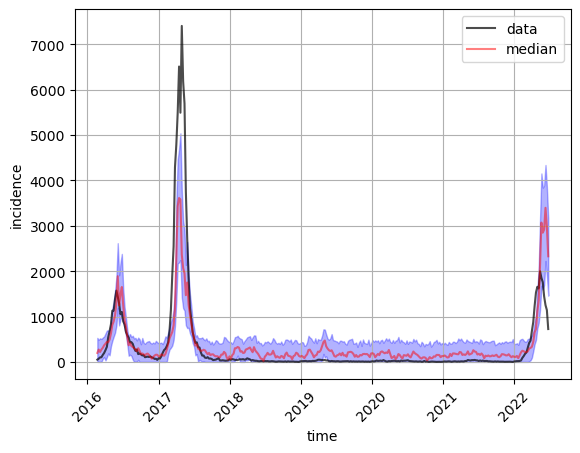

In [6]:
metrics = apply_dengue_chik(CITY, ini_date = INI_DATE, 
                         end_date = END_DATE, look_back = LOOK_BACK,
                         predict_n = PREDICT_N,  label_m = f'msle_all', filename = FILENAME_DATA  )

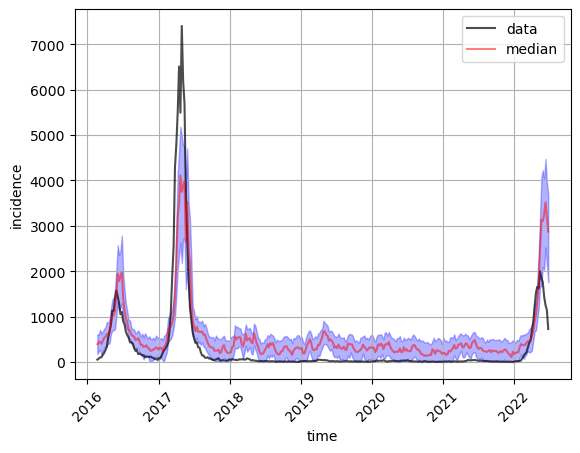

In [7]:
metrics = apply_dengue_chik(CITY, ini_date = INI_DATE, 
                         end_date = END_DATE, look_back = LOOK_BACK,
                         predict_n = PREDICT_N,  label_m = f'custom_msle_all', filename = FILENAME_DATA  )

Applying the **transfer learning** techinique:

- Using the model trained with `loss = 'msle'`:


Compilation Time :  0.0013587474822998047
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 41)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             3200      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_2 (Dropout)         (None, 8)               

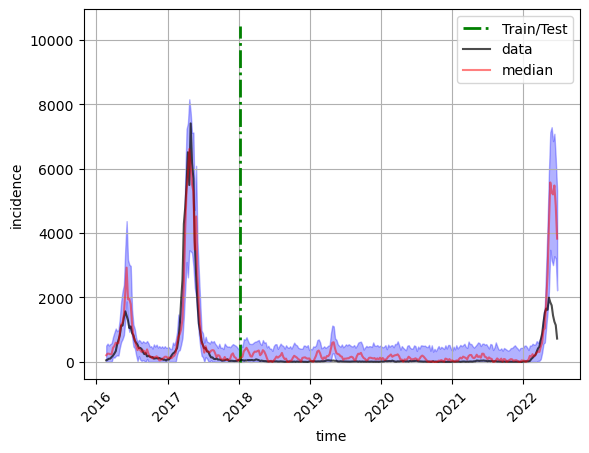

In [9]:

END_DATE_TRAIN = f'2018-01-01'

model = build_model(hidden = 8, features = FEAT, predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=1, loss = 'msle')

    
m_msle, m_t, m_val = transf_chik_pred(model, CITY, ini_date = INI_DATE, end_train_date = END_DATE_TRAIN,  
                                end_date = END_DATE, filename = f'../../saved_models/lstm/trained_{CITY}_model_msle_all.h5',  epochs= EPOCHS, features = FEAT,  
                                predict_n = PREDICT_N, look_back = LOOK_BACK, loss = 'msle' , validation_split = 0.0,
                                label = f'transf_msle', filename_data = FILENAME_DATA )

Compilation Time :  0.0013020038604736328
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4, 41)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             3200      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_2 (Dropout)         (None, 8)               

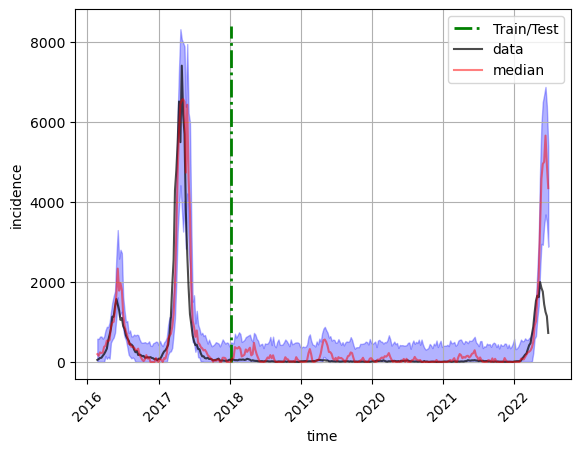

In [11]:
from lstm import custom_loss_msle

model = build_model(hidden = 8, features = FEAT, predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=1, loss = custom_loss_msle(p=10))

    
m_msle, m_t, m_val = transf_chik_pred(model, CITY, ini_date = INI_DATE, end_train_date = END_DATE_TRAIN,  
                                end_date = END_DATE, filename = f'../../saved_models/lstm/trained_{CITY}_model_custom_msle_all.h5',  epochs= EPOCHS, features = FEAT,  
                                predict_n = PREDICT_N, look_back = LOOK_BACK, loss = custom_loss_msle(p=10) , validation_split = 0.0,
                                label = f'transf_custom_msle', filename_data = FILENAME_DATA )

Apply the pgbm model:

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


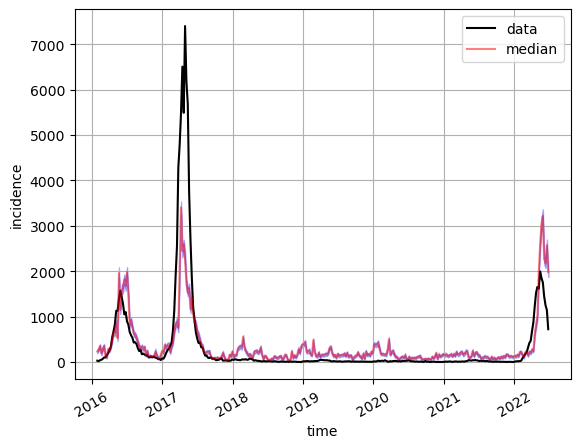

In [12]:
preds, preds25, preds975, X_data, targets = cross_dengue_chik_prediction(CITY, STATE, predict_n = PREDICT_N, look_back = LOOK_BACK, ini_date = INI_DATE, end_date = END_DATE, filename = FILENAME_DATA )
    